E01 missing aggregation

1. Finding missing values

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


a) Read in the file "student-mat-missing-data.csv" found in the course github repo into a Pandas DataFrame

In [4]:
df = pd.read_csv(r"C:\Users\vilma\Databehandling-VILMA-LINDROTH\student-mat-missing-data.csv")

b) Do some initial explorations with the methods to get an understanding of the dataset:

head(), info(), describe(), value_counts(), unique(), columns()

In [5]:
#df.head()
#df.info()
#df.describe()
#df.value_counts()
#df["sex"].unique()
#df.columns


c) Create a function that takes in a DataFrame as input parameter and plots a barplot with the columns that have missing values. Put this function into a file called data_utils.py. When you come across more useful functions, you can store them in your data_utils module.

In [6]:
'''
def missing_values_barplot(DataFrame) -> None:
    missing_values = DataFrame.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_values.index, y=missing_values.values)
    plt.xticks(rotation=90)
    plt.title("Missing Values per Column")
    plt.ylabel("Number of Missing Values")
    plt.xlabel("Columns")
    plt.show()
'''


'\ndef missing_values_barplot(DataFrame) -> None:\n    missing_values = DataFrame.isnull().sum()\n    missing_values = missing_values[missing_values > 0]\n    plt.figure(figsize=(10, 6))\n    sns.barplot(x=missing_values.index, y=missing_values.values)\n    plt.xticks(rotation=90)\n    plt.title("Missing Values per Column")\n    plt.ylabel("Number of Missing Values")\n    plt.xlabel("Columns")\n    plt.show()\n'

d) Now import your function from the module data_utils and use it to visualize NaNs in your dataset.

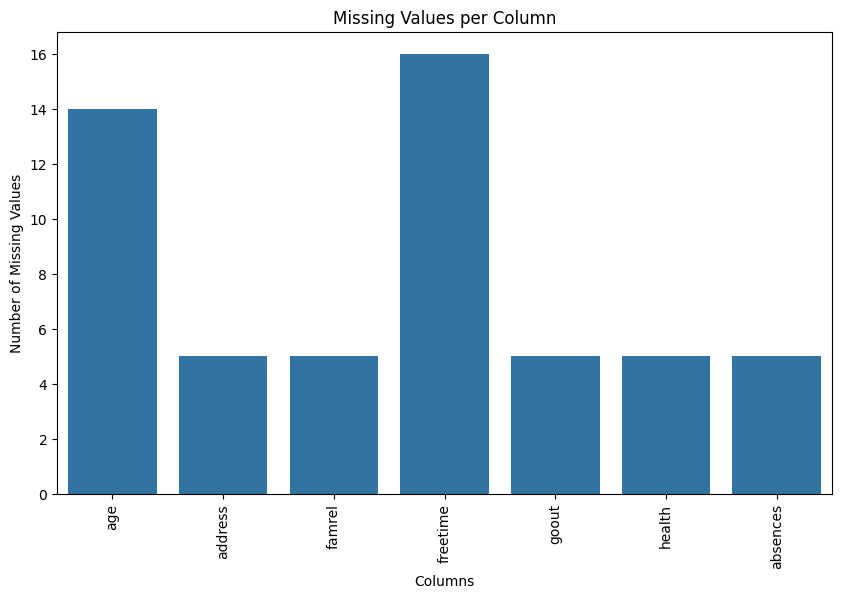

In [7]:
from data_utils import missing_values_barplot

missing_values_barplot(df)



e) Find all rows where the freetime is NaN.

In [10]:
freetime_missing = df[df["freetime"].isnull()]
freetime_missing

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
87,87,GP,F,15.0,U,GT3,T,4,2,other,...,5.0,NaN,3.0,1,3,1.0,4.0,13,14,14
99,99,GP,F,16.0,U,GT3,T,4,3,other,...,5.0,NaN,5.0,1,1,3.0,0.0,7,9,8
130,130,GP,F,15.0,R,GT3,T,3,4,services,...,4.0,NaN,2.0,2,2,5.0,0.0,12,0,0
149,149,GP,M,15.0,U,LE3,A,2,1,services,...,4.0,NaN,5.0,2,5,5.0,0.0,8,9,10
151,151,GP,M,16.0,U,LE3,T,2,1,at_home,...,4.0,NaN,4.0,3,5,5.0,6.0,12,13,14
160,160,GP,M,NaN,NaN,LE3,T,2,1,at_home,...,NaN,NaN,NaN,2,2,NaN,NaN,7,6,0
191,191,GP,F,NaN,NaN,GT3,T,1,1,at_home,...,NaN,NaN,NaN,1,1,NaN,NaN,8,8,9
257,257,GP,M,19.0,U,LE3,A,4,3,services,...,4.0,NaN,1.0,1,1,1.0,12.0,11,11,11
276,276,GP,F,NaN,NaN,GT3,A,3,2,other,...,NaN,NaN,NaN,1,1,NaN,NaN,10,9,9
293,293,GP,F,NaN,NaN,LE3,T,3,1,services,...,NaN,NaN,NaN,1,1,NaN,NaN,18,18,18


f) Find all rows where the freetime or the age is NaN.

In [17]:
freetime_or_age_missing = df[df["freetime"].isnull() | df["age"].isnull()].index
freetime_or_age_missing

Index([ 20,  71,  87,  99, 102, 106, 121, 130, 149, 151, 160, 188, 191, 214,
       257, 270, 276, 293, 308, 330, 343, 348, 359, 372, 385],
      dtype='int64')

g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

In [16]:
rows_with_NaN = df.isna().any(axis=1)
num_rows_with_NaN = rows_with_NaN.sum()
total_rows = len(df)
proportion = num_rows_with_NaN / total_rows
print(f"Proportion of rows with missing values: {proportion}")


Proportion of rows with missing values: 0.06329113924050633


2. Clean the data

a) As you have conversed with a domain expert you both agree that there are too many missing data to fill in and the proportion is small enough to be safe to just remove.
Now remove these rows and use your missing-value utility function visualize the remaining NaNs.

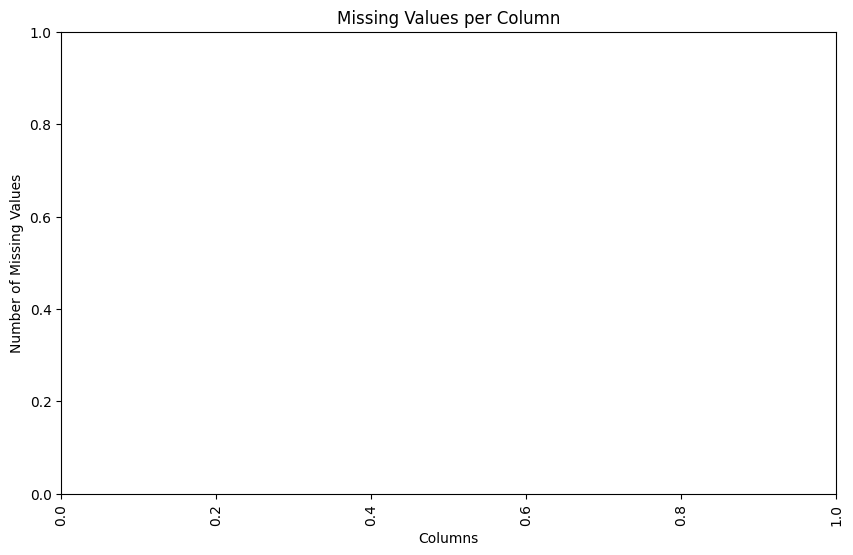

In [21]:
df_clean = df.dropna()
df_clean = df_clean.reset_index(drop = True)

missing_values_barplot(df_clean)


b) The domain expert has told you that you have to fill in the missing age values. Start with visualising the age distribution in the dataset using a histogram.

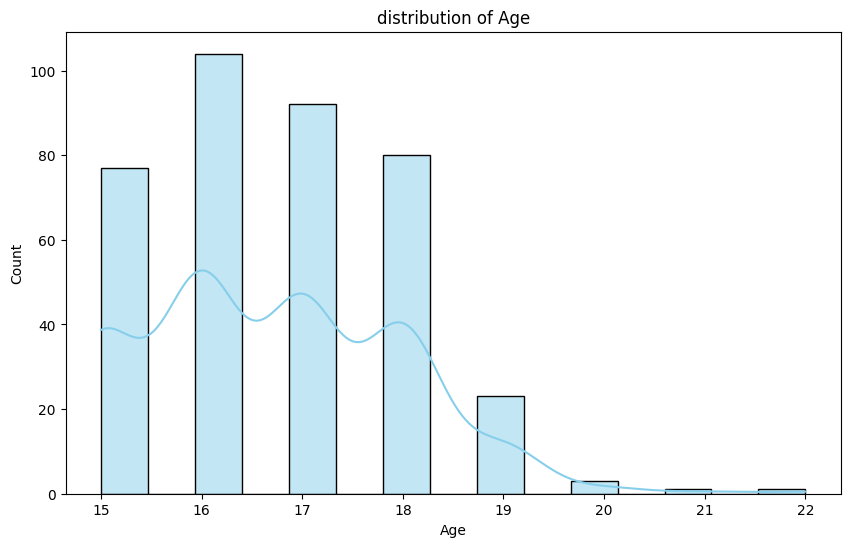

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df["age"].dropna(), bins=15, kde=True, color='skyblue')
plt.title("distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [34]:
df["age"].mean()
df["age"].median()

np.float64(17.0)

c) Check which columns there are in the dataset to see what can be utilised in determining the age.

In [35]:
df.columns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

d) The column higher seems interesting. Let's see which unique values it can have.

In [36]:
df["higher"].unique()

array(['yes', 'no'], dtype=object)

e) Let's see if we can see some connection between age distribution and higher. Make 3 subplots of age histograms:

Plot 1: same as b)
Plot 2: age distribution when higher is yes
Plot 3: age distribution when higher is no

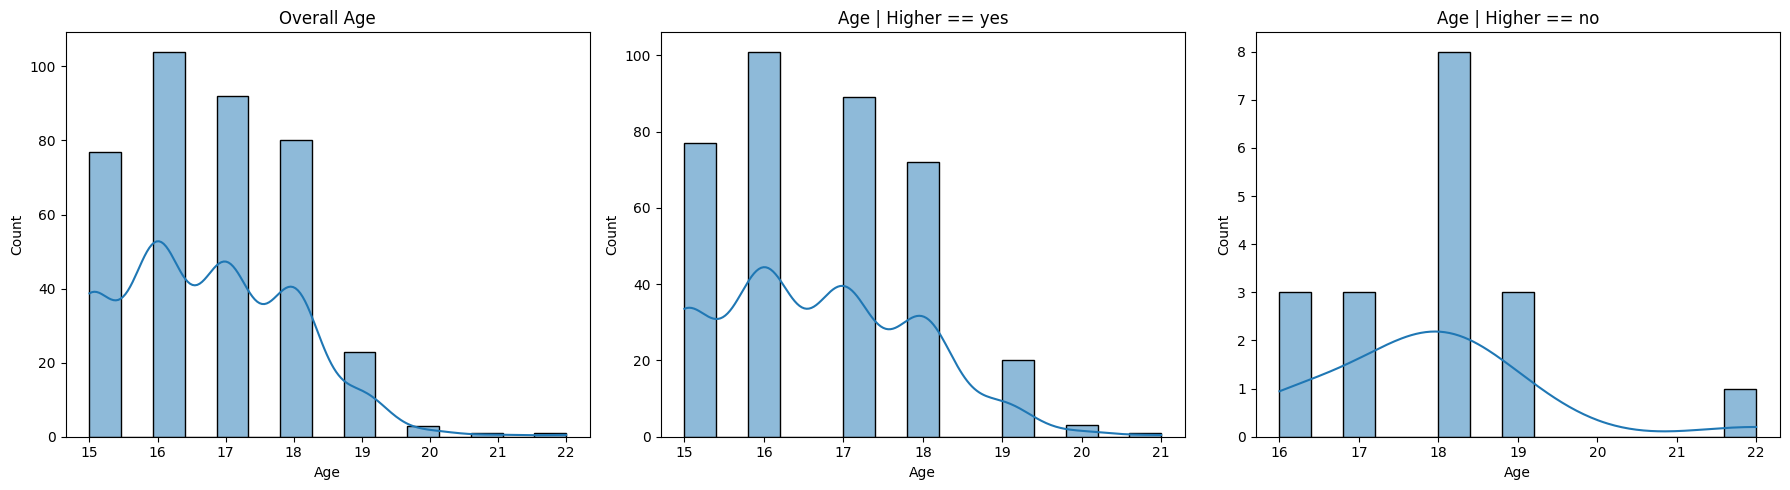

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

titles = ["Overall Age", "Age | Higher == yes", "Age | Higher == no"]
data_frames = [df["age"].dropna(), df["age"].dropna()[df["higher"] == "yes"], df["age"].dropna()[df["higher"] == "no"]]

for i in range(3):
    sns.histplot(data_frames[i], bins=15, kde=True, ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Age")
    axes[i].set_ylabel("Count")
plt.tight_layout()
plt.show()

f) That was hard to find a connection. When reading dataset source we find alcohol consumption, maybe there is some connection between age and alcohol consumption.

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

Start with creating a new column called Alcohol, which is a sum of Dalc and Walc columns

In [ ]:
df["Alcohol"] = df["Dalc"] + df["Walc"]

   Dalc  Walc  Alcohol
0     1     1        2
1     1     1        2
2     2     3        5
3     1     1        2
4     1     2        3


g) Make a barchart for alcohol consumption vs age.

<Axes: xlabel='age', ylabel='Alcohol'>

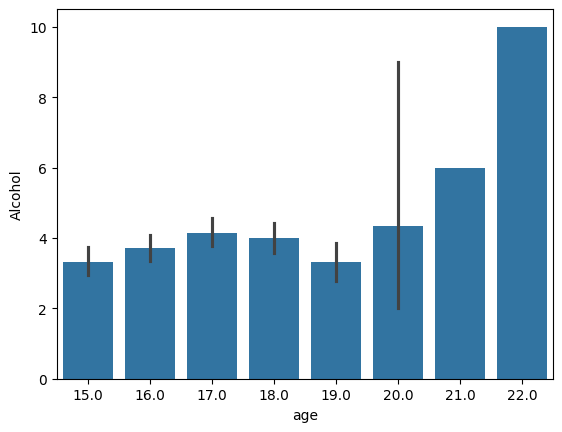

In [48]:
sns.barplot(x="age", y="Alcohol", data=df)

h) We see that older students tend to drink more, but notice how few 20-22 year-old students we have in the dataset. We can definitely exclude them when computing the missing values. However there are also few 19 year-old students in the dataset, say for simplicity that we can exclude them as well. This leaves:

alcohol level >= 4 -> 16, 17 or 18 years old -> take median to simplify
alcohol level < 4 -> 15 years old
Fill these in and visualize missing values.

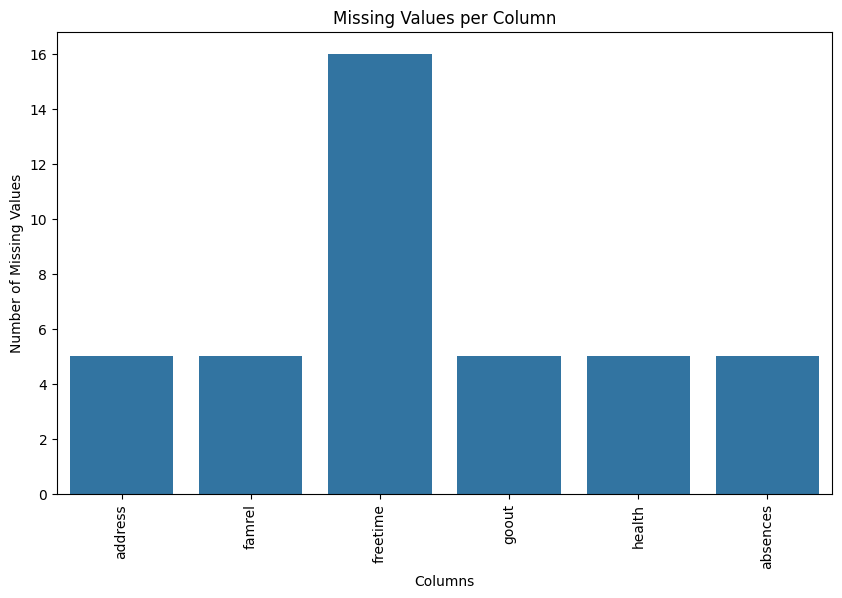

In [50]:
age_high_alc = df.loc[df["Alcohol"] >= 4, "age"].median()
age_low_alc = 15
df.loc[df["Alcohol"] < 4, "age"] = df.loc[df["Alcohol"] < 4, "age"].fillna(age_low_alc)
df.loc[df["Alcohol"] >= 4, "age"] = df.loc[df["Alcohol"] >= 4, "age"].fillna(age_high_alc)

missing_values_barplot(df)

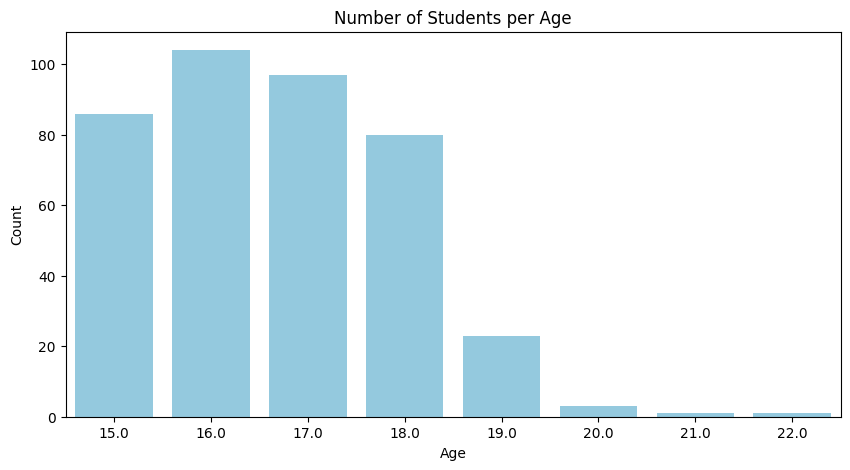

In [52]:
plt.figure(figsize=(10, 5))
sns.countplot(x='age', data=df, color='skyblue')
plt.title('Number of Students per Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

3. Clean freetime column

Now there are missing data on freetime that needs to be filled.

Try yourself and find reasonable approaches for how you would fill those missing data.
Document what you have tried and different findings
Combine suitable visualizations with pandas methods